### Choose best model for classification (our data set)

1-Import Libraries

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2-Data set Load

In [76]:
df=sns.load_dataset("titanic")
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


3-Explore Data set

In [77]:
df.columns


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [78]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [80]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [82]:
df.memory_usage(deep=True)

Index            132
survived        7128
pclass          7128
sex            47851
age             7128
sibsp           7128
parch           7128
fare            7128
embarked       44514
class           1162
who            47040
adult_male       891
deck            1541
embark_town    52991
alive          45783
alone            891
dtype: int64

4-PreProcess DataSet / Data wrangling

* Fill empty values
* Age column contain 177 null values
* deck column contain deck 688 null values(remove more then 70% od data absent)

In [83]:
df.drop(columns=['deck'],inplace=True)

In [84]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [85]:
df["age"] = df["age"].fillna(df["age"].mean())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])
df["embark_town"] = df["embark_town"].fillna(df["embark_town"].mode()[0])

In [86]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

5-Visualize Data set

In [92]:

x=df[['pclass','sex','age','fare','sibsp','parch']]
y=df['survived']

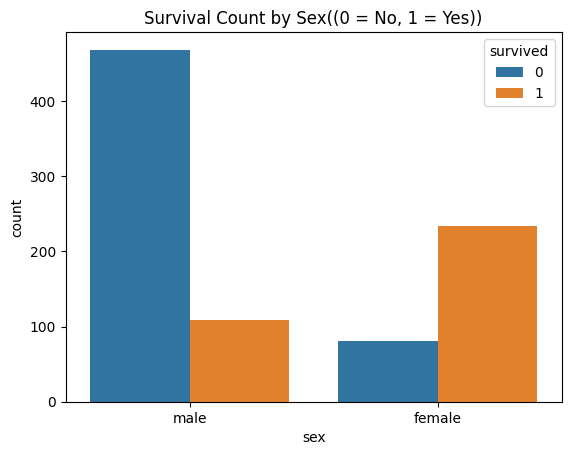

In [93]:
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival Count by Sex((0 = No, 1 = Yes))")
plt.show()


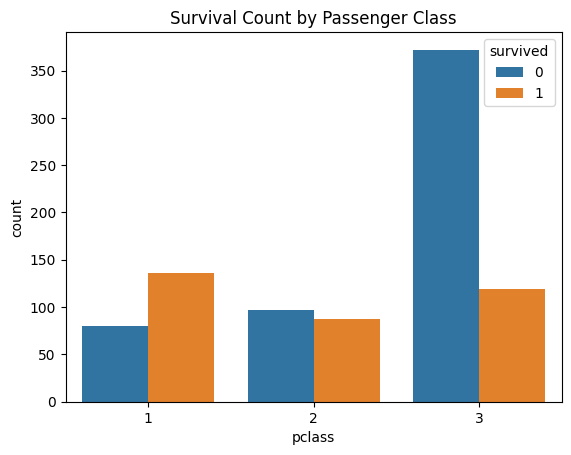

In [94]:
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival Count by Passenger Class")
plt.show()


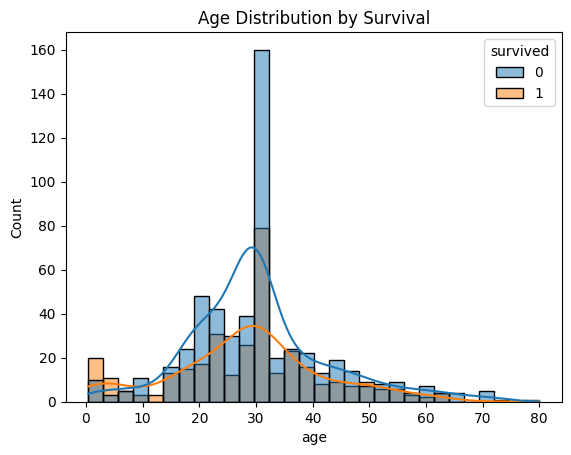

In [ ]:
sns.histplot(data=df, x='age', hue='survived', kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.show()


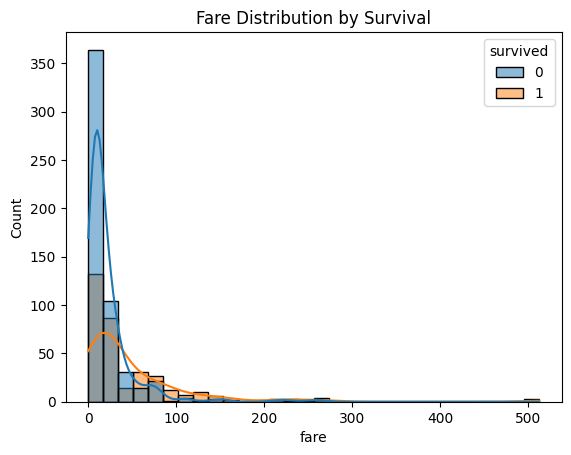

In [ ]:
sns.histplot(data=df, x='fare', hue='survived', kde=True, bins=30)
plt.title("Fare Distribution by Survival")
plt.show()


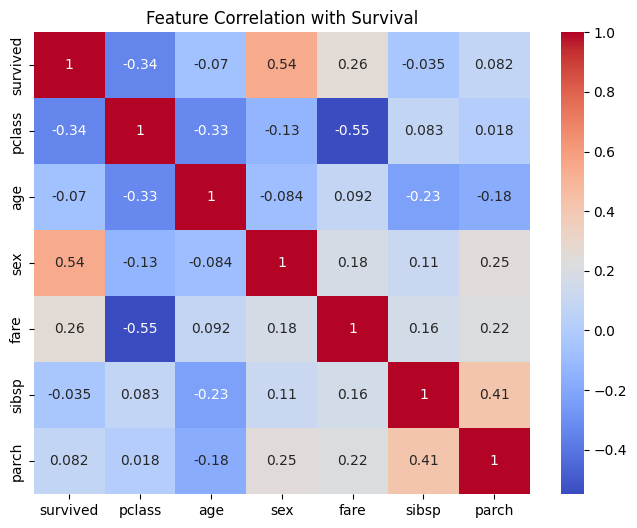

In [97]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

plt.figure(figsize=(8,6))
sns.heatmap(df[['survived','pclass','age','sex','fare','sibsp','parch']].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Survival")
plt.show()



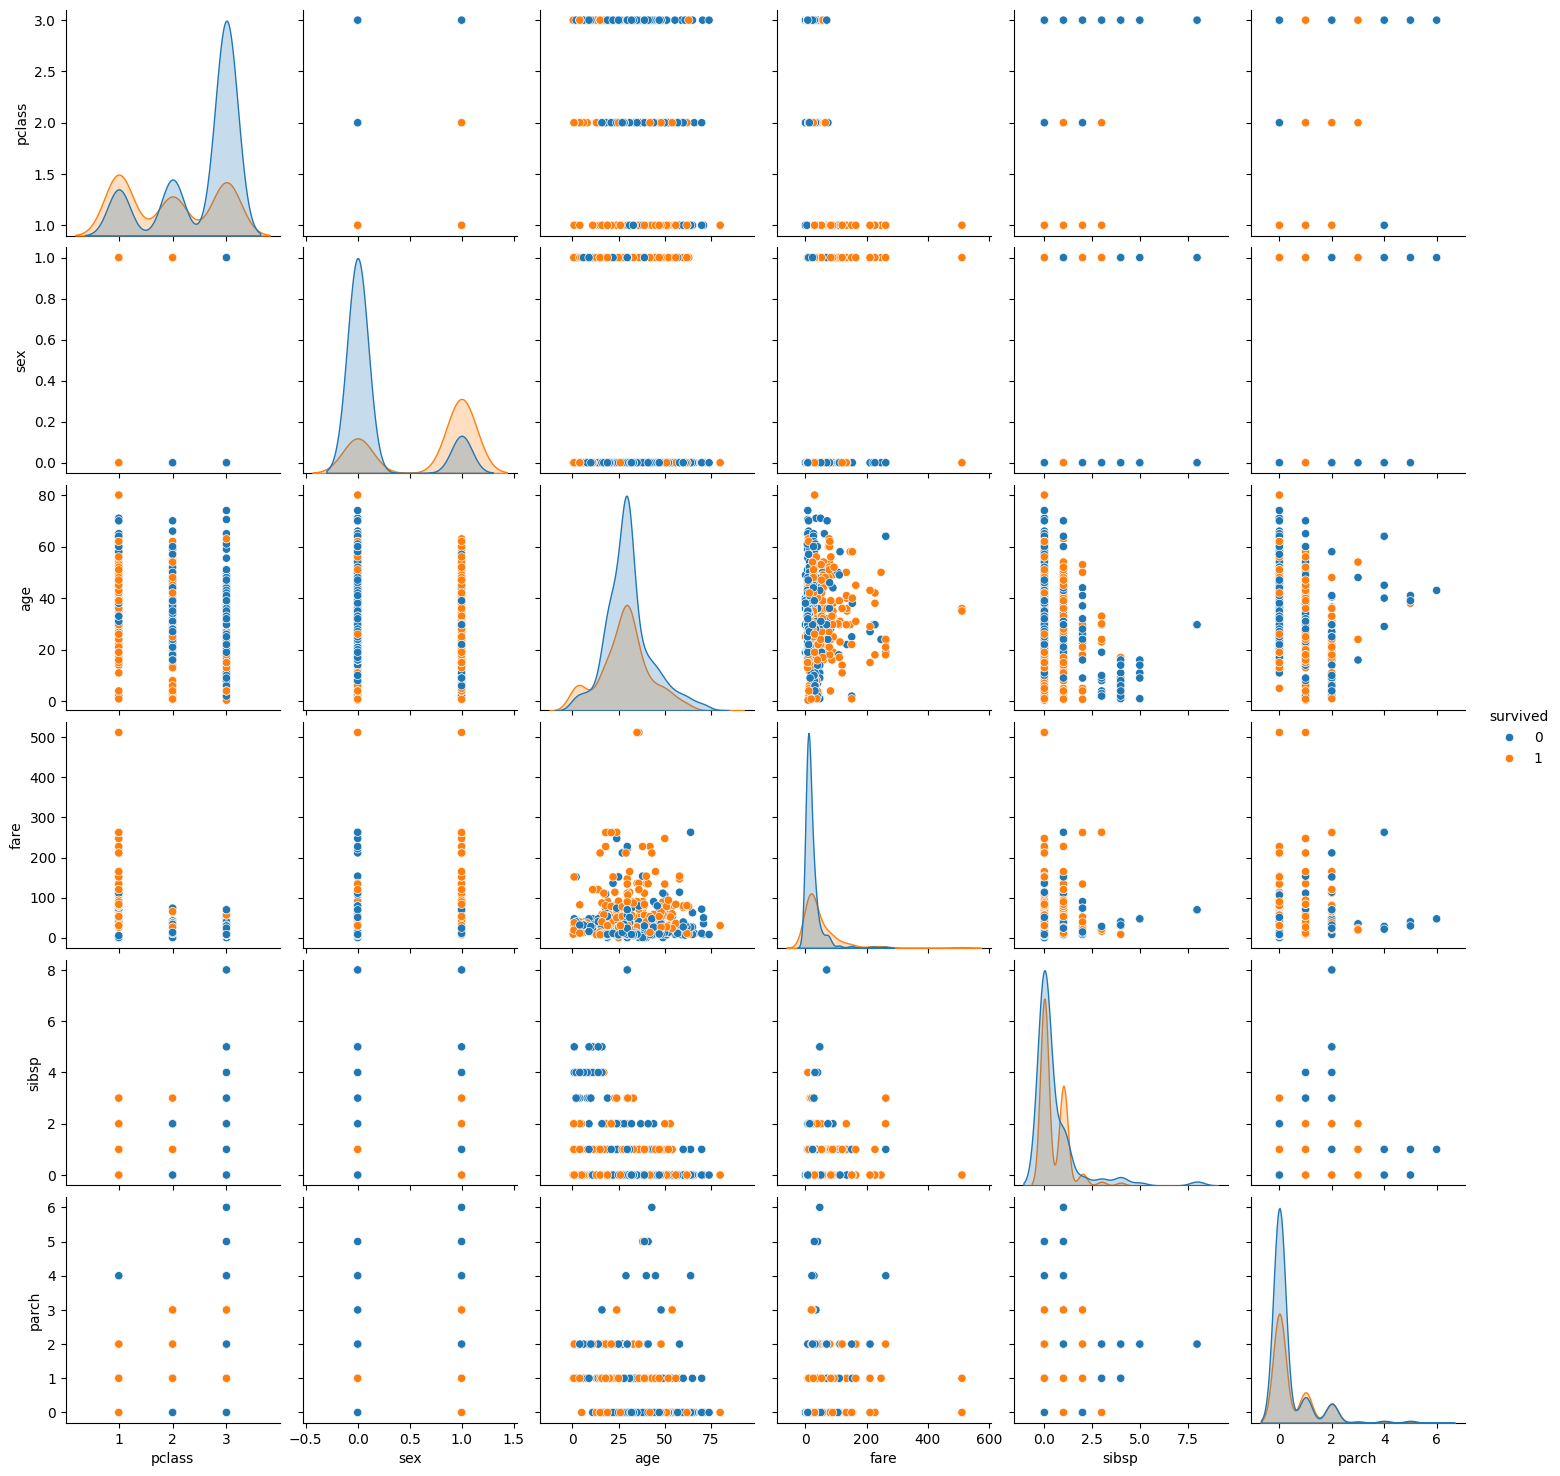

In [98]:
sns.pairplot(df[['pclass','sex','age','fare','sibsp','parch','survived']],hue='survived')

6-Train model

  * Import model 
  
  1- Logistic Regression

  2- SVM

  3- Random Forest

  4- KNN
  
  5- Decision tree

  * Evolution Mfetrics
  
  1- Accuracy

  2-Preciision

  3- f1-score

  4- Classification Report

  5- Recall 



In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score

In [100]:
z=pd.get_dummies(x,columns=['sex'])
x=df[['pclass','sex','age','fare','sibsp','parch']]
y=df['survived']

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [102]:
print(" *** ACcuracy of All these models *** ")
models=[LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
models_names=["LogisticRegression","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","SVC"]
models_score=[]
for models,models_names in zip(models,models_names):
    models.fit(x_train,y_train)
    y_pred=models.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    models_score.append([models_names,accuracy])
    
sorted_models=sorted(models_score,key=lambda x:x[1],reverse=True)  
for model in sorted_models:
    print("Model:",model[0],"ACcuracy:",model[1])  

 *** ACcuracy of All these models *** 
Model: LogisticRegression ACcuracy: 0.8100558659217877
Model: RandomForestClassifier ACcuracy: 0.8100558659217877
Model: DecisionTreeClassifier ACcuracy: 0.770949720670391
Model: KNeighborsClassifier ACcuracy: 0.6983240223463687
Model: SVC ACcuracy: 0.6536312849162011


In [103]:
print(" *** Precision Score of All these models *** ")
models=[LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
models_names=["LogisticRegression","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","SVC"]
models_score=[]
for models,models_names in zip(models,models_names):
    models.fit(x_train,y_train)
    y_pred=models.predict(x_test)
    precision=precision_score(y_test,y_pred)
    models_score.append([models_names,precision])
    
sorted_models=sorted(models_score,key=lambda x:x[1],reverse=True)  
for model in sorted_models:
    print("Model:",model[0],"precision:",model[1])  

 *** Precision Score of All these models *** 
Model: LogisticRegression precision: 0.803030303030303
Model: RandomForestClassifier precision: 0.7941176470588235
Model: SVC precision: 0.75
Model: DecisionTreeClassifier precision: 0.7361111111111112
Model: KNeighborsClassifier precision: 0.6666666666666666


In [104]:
print(" *** f1 Score of All these models *** ")
models=[LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
models_names=["LogisticRegression","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","SVC"]
models_score=[]
for models,models_names in zip(models,models_names):
    models.fit(x_train,y_train)
    y_pred=models.predict(x_test)
    f1=f1_score(y_test,y_pred)
    models_score.append([models_names,f1])
    
sorted_models=sorted(models_score,key=lambda x:x[1],reverse=True)  
for model in sorted_models:
    print("Model:",model[0],"f1:",model[1])  

 *** f1 Score of All these models *** 
Model: RandomForestClassifier f1: 0.7605633802816901
Model: LogisticRegression f1: 0.7571428571428571
Model: DecisionTreeClassifier f1: 0.7083333333333334
Model: KNeighborsClassifier f1: 0.5970149253731343
Model: SVC f1: 0.3673469387755102


In [105]:
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

print("*** Recall Score of All Models ***")

models_list = [
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    SVC()
]

models_names = [
    "LogisticRegression",
    "RandomForestClassifier",
    "DecisionTreeClassifier",
    "KNeighborsClassifier",
    "SVC"
]

models_scores = []

for model, name in zip(models_list, models_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    recall_val = recall_score(y_test, y_pred)
    models_scores.append([name, recall_val])

sorted_models = sorted(models_scores, key=lambda x: x[1], reverse=True)

for model in sorted_models:
    print("Model:", model[0], "Recall Score:", model[1])


*** Recall Score of All Models ***
Model: LogisticRegression Recall Score: 0.7162162162162162
Model: RandomForestClassifier Recall Score: 0.7162162162162162
Model: DecisionTreeClassifier Recall Score: 0.6891891891891891
Model: KNeighborsClassifier Recall Score: 0.5405405405405406
Model: SVC Recall Score: 0.24324324324324326


In [106]:
print(" *** classification report of All these models *** ")
models=[LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
models_names=["LogisticRegression","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","SVC"]
models_score=[]
for models,models_names in zip(models,models_names):
    models.fit(x_train,y_train)
    y_pred=models.predict(x_test)
    classification=classification_report(y_test,y_pred)
    models_score.append([models_names,classification])
    
sorted_models=sorted(models_score,key=lambda x:x[1],reverse=True)  
for model in sorted_models:
    print("Model:",model[0],"classification:",model[1])  

 *** classification report of All these models *** 
Model: RandomForestClassifier classification:               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Model: LogisticRegression classification:               precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Model: DecisionTreeClassifier classification:               precision    recall  f1-score   support

           0       0.79      0.82      0.80       105
           1       0.73      0.69      0.71        

Confusion Matrix for LogisticRegression:
[[92 13]
 [21 53]]


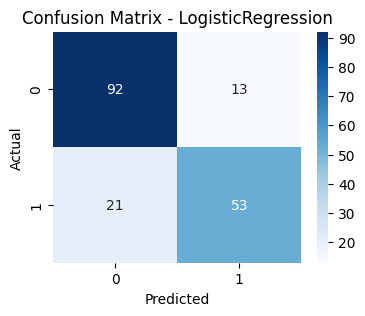

Confusion Matrix for RandomForestClassifier:
[[89 16]
 [17 57]]


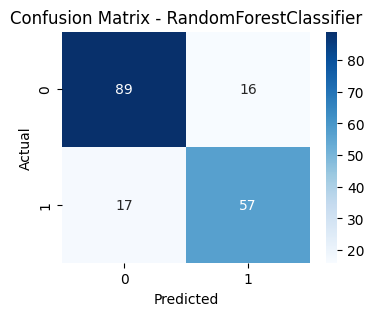

Confusion Matrix for DecisionTreeClassifier:
[[87 18]
 [23 51]]


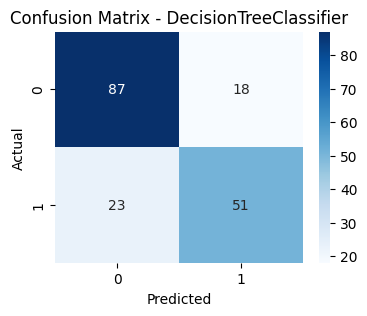

Confusion Matrix for KNeighborsClassifier:
[[85 20]
 [34 40]]


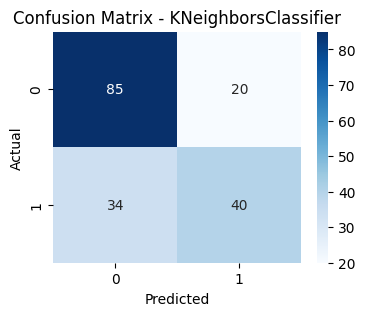

Confusion Matrix for SVC:
[[99  6]
 [56 18]]


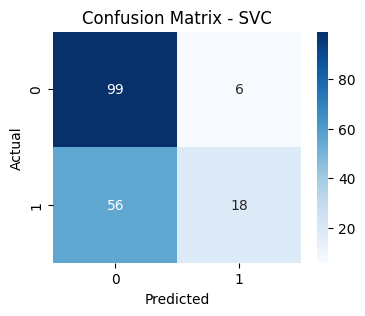

In [107]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# List of models and names
models_list = [
    LogisticRegression(max_iter=1000),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    SVC()
]

models_names = [
    "LogisticRegression",
    "RandomForestClassifier",
    "DecisionTreeClassifier",
    "KNeighborsClassifier",
    "SVC"
]

# Evaluate models
for model, name in zip(models_list, models_names):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for {name}:")
    print(cm)
    
    # Heatmap visualization
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
